In [242]:
import pandas as pd

In [243]:
# Wczytaj plik EURUSD30.csv (źródło: Kaggle). Kolejne kolumny to: DateTime, Open, High, Low, Close, Volume.
df = pd.read_csv('data/EURUSD30.csv', sep='\t')
df.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [244]:
df.head()

,DateTime,Open,High,Low,Close,Volume
0,2017-12-13 11:00,1.17512,1.17514,1.17441,1.17443,4270
1,2017-12-13 11:30,1.17442,1.17444,1.17381,1.17393,4540
2,2017-12-13 12:00,1.17392,1.17427,1.17334,1.17351,5130
3,2017-12-13 12:30,1.17351,1.17401,1.17300,1.17401,5204
4,2017-12-13 13:00,1.17398,1.17409,1.17294,1.17353,4958


In [245]:
# Odfiltruj wiersze z brakującymi danymi
df.isnull().sum()

DateTime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [246]:
# Utwórz DataFrame zawierające te same dane, ale w ujęciu dziennym.

df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Date'] = df['DateTime'].dt.date

grouped_df = df.groupby('Date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [247]:
grouped_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-13,1.17512,1.18404,1.17294,1.18361,155056
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500
2017-12-18,1.17432,1.18342,1.17420,1.17837,199846


In [248]:
# Utwórz serię danych zawierającą procentowy wzrost (lub spadek) kursu w danym dniu (jako różnicę Open i Close).
grouped_df['PercentChange'] = ((grouped_df['Close'] - grouped_df['Open']) / grouped_df['Open']) * 100

# grouped_df['PercentChange'] = grouped_df['PercentChange'].round(2).astype(str) + '%'

grouped_df[['Open', 'High', 'Low', 'Close', 'Volume', 'PercentChange']].head()
# grouped_df['PercentChange'].head()

,Open,High,Low,Close,Volume,PercentChange
Date,,,,,,
2017-12-13,1.17512,1.18404,1.17294,1.18361,155056,0.722479
2017-12-14,1.18361,1.18625,1.17645,1.17745,241280,-0.520442
2017-12-15,1.17745,1.18123,1.17488,1.17492,200462,-0.214871
2017-12-17,1.17441,1.17509,1.17377,1.17432,8500,-0.007663
2017-12-18,1.17432,1.18342,1.17420,1.17837,199846,0.344880


In [249]:
# Oblicz średnią i odchylenie standardowe tej kolumny oraz narysuj histogram.
mean_value = grouped_df['PercentChange'].mean()
std_dev = grouped_df['PercentChange'].std()

print(f"Średnia zmiana procentowa: {mean_value:.4f}%")
print(f"Odchylenie standardowe zmiany procentowej: {std_dev:.4f}%")

Średnia zmiana procentowa: -0.0023%
Odchylenie standardowe zmiany procentowej: 0.3677%


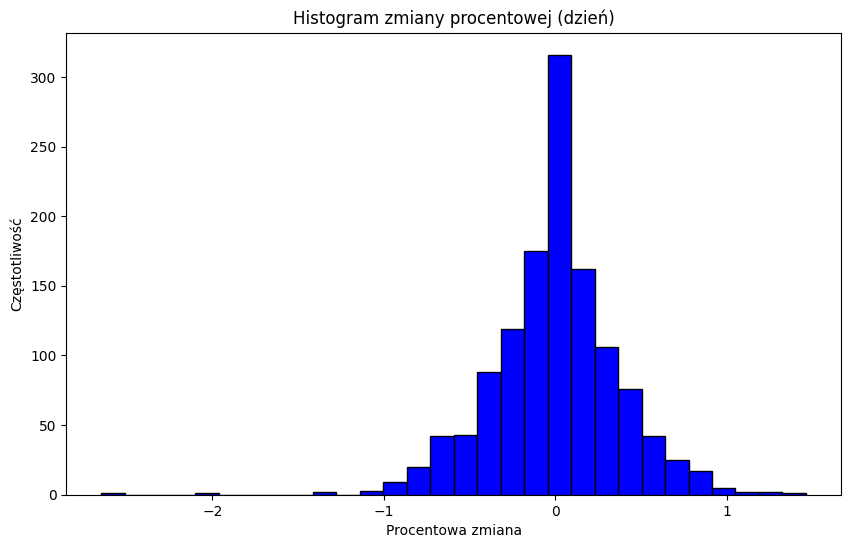

In [250]:
import matplotlib.pyplot as plt 

grouped_df['PercentChange'].plot(kind='hist', bins=30, figsize=(10, 6), color='blue', edgecolor='black')
plt.title('Histogram zmiany procentowej (dzień)')
plt.xlabel('Procentowa zmiana')
plt.ylabel('Częstotliwość')
plt.show()